### Importing Libraries

  - `pandas` as `pd` for data manipulation and analysis.
  - `numpy` as `np` for numerical operations.
  - `matplotlib.pyplot` as `plt` for creating visualizations.
  - `ast` for safely evaluating strings into python objects.
  - `seaborn` as `sns` for statistical data visualization and enhanced plotting.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast  
import seaborn as sns

### Loading Data

- **Reading CSV File:** reading a csv file into a dataframe named `df`, which is used for data analysis and manipulation.


In [2]:
df = pd.read_csv(r'D:\Python\Files\data_jobs.csv')
df.sample(2)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
129779,Senior Data Scientist,"(Senior) Data Scientist | Analyst, Python, R, ...","Cologne, Germany",via XING,Full-time,False,Germany,2023-02-05 08:25:37,False,False,Germany,NaN,NaN,NaN,Vesterling AG,['sql'],{'programming': ['sql']}
203010,Data Scientist,Lead Data Scientist,"Las Vegas, NV",via Indeed,Full-time,False,"California, United States",2023-06-03 22:02:33,False,False,United States,NaN,NaN,NaN,Skillz Inc.,"['python', 'r', 'sql']","{'programming': ['python', 'r', 'sql']}"


### Data Cleanup

- **Renaming Columns:** assigning new column names to the dataframe.

- **Converting Dates:** using `pd.to_datetime()` to change the 'posted_dt' column from string to datetime format.

- **Converting Skills:**
  - using `.apply() `function to convert 'skills' from string to list format by applying a custom function to  every row of a dataFrame.
  - using `ast.literal_eval()` to evaluate and convert strings to python objects.
  - ensuring conversion only happens if the value is not missing using `pd.notna(gg)`.

- **Handling Missing Values:** optionally dropping rows with missing values in the 'salyr' column using `df.dropna()` (commented out).

In [3]:
new_columns = ['job', 'full_name', 'location', 'via', 'schedule', 'work_from_home','search_location','posted_dt','no_degree','health_ins','country','salrate','salyr','salhr','company','skills','skilltype']
df.columns = new_columns

# data clean up
df['posted_dt'] = pd.to_datetime(df['posted_dt'])
df['skills'] = df['skills'].apply(lambda gg: ast.literal_eval(gg) if pd.notna(gg) else gg)
#df.dropna(subset=['salyr'],inplace=True)

### Sample

- Random sample of 2 rows from the modified dataFrame `df`

In [4]:
df.sample(2)

,job,full_name,location,via,schedule,work_from_home,search_location,posted_dt,no_degree,health_ins,country,salrate,salyr,salhr,company,skills,skilltype
489351,Data Analyst,Material Data Analyst,"Boca Raton, FL",via JobServe,Full-time,False,"Florida, United States",2023-05-18 11:00:20,False,True,United States,NaN,NaN,NaN,Material Bank,[excel],{'analyst_tools': ['excel']}
732325,Data Analyst,Data Analyst,"Dallas, NC",via Indeed,Contractor,False,Georgia,2023-01-13 22:20:06,False,False,United States,year,79123.6875,NaN,Infocodec Solutions,"[sql, javascript, sas, sas, excel, spss]","{'analyst_tools': ['sas', 'excel', 'spss'], 'p..."


# For Data Analysts in USA

### Analyzing Top 10 Skills by Median Salary and Count

- **Filtering DataFrame:** filtering the dataframe to include only rows where the job title is `'Data Analyst'` and the country is `'United States'`, creating a new dataframe `df_da_us`. the `skills` column is then being exploded to create a row for each skill.

- **Calculating Median Salary:**
  - calculating the median and count of salaries (`salyr`) for each skill in `df_da_us`, sorting the results by median salary in descending order.
  - selecting the top 10 skills and storing them in `mediansalyr_us`.

- **Calculating Salary Count:**
  - calculating the median and count of salaries (`salyr`) for each skill, sorting the results by count in descending order and then by median salary in descending order.
  - selecting the top 10 skills and storing them in `countsalyr_us`.


In [5]:
df_da_us = df[(df['job'] == 'Data Analyst') & (df['country']== 'United States')].copy()
df_da_us = df_da_us.explode('skills')
mediansalyr_us = df_da_us.groupby('skills')['salyr'].agg(['median', 'count']).sort_values(by= 'median',ascending=False).head(10)
countsalyr_us = df_da_us.groupby('skills')['salyr'].agg(['median', 'count']).sort_values(by= 'count', ascending=False).head(10).sort_values(by='median', ascending=False)

In [6]:
mediansalyr_us

,median,count
skills,,
dplyr,196250.0,2
bitbucket,189000.0,3
gitlab,186000.0,3
solidity,179000.0,1
hugging face,175000.0,1
couchbase,160515.0,1
ansible,159640.0,1
mxnet,149000.0,2
cassandra,148250.0,6


In [7]:
countsalyr_us

,median,count
skills,,
python,97500.00,1431
tableau,92875.00,1364
r,92500.00,893
sql server,92500.00,286
sql,91000.00,2508
sas,90000.00,926
power bi,90000.00,838
powerpoint,85000.00,462
excel,84392.00,1808


### Plotting

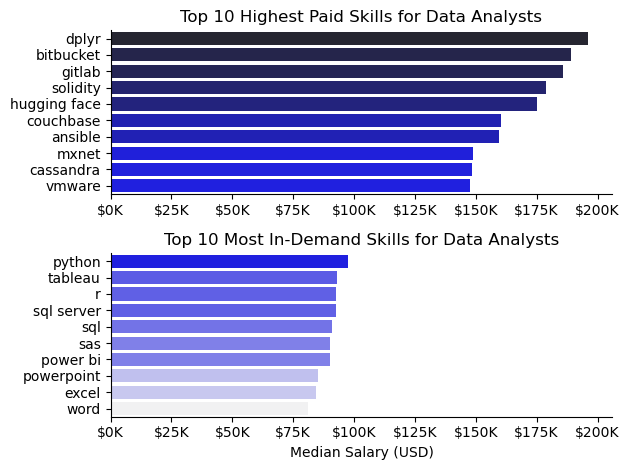

In [8]:
# Setting Up for Plot
fig,ax = plt.subplots(2,1)

# Creating Plot
sns.barplot(data=mediansalyr_us, x='median', y=mediansalyr_us.index, hue='median', ax=ax[0], palette='dark:b_r')
sns.barplot(data=countsalyr_us,  x='median', y=countsalyr_us.index,  hue='median', ax=ax[1], palette='light:b')

# Modifying Axes and Lables
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))
ax[0].legend().remove()

ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim()) 
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K')) # to convert 100000 to $100k at x-axis
ax[1].legend().remove()

# Displaying the plot
sns.despine()   # to remove borders                                                                                                                     # removes the border
plt.tight_layout()
plt.show()

# For Data Analysts in India

### Analyzing Top 10 Skills by Median Salary and Count

- **Filtering DataFrame:** filtering the dataframe to include only rows where the job title is `'Data Analyst'` and the country is `'India'`, creating a new dataframe `df_da_ind`. the `skills` column is then being exploded to create a row for each skill.

- **Calculating Median Salary:**
  - calculating the median and count of salaries (`salyr`) for each skill in `df_da_ind`, sorting the results by median salary in descending order.
  - selecting the top 10 skills and storing them in `mediansalyr_ind`.

- **Calculating Salary Count:**
  - calculating the median and count of salaries (`salyr`) for each skill, sorting the results by count in descending order and then by median salary in descending order.
  - selecting the top 10 skills and storing them in `countsalyr_ind`.


In [9]:
df_da_ind = df[(df['job'] == 'Data Analyst') & (df['country']== 'India')].copy()
df_da_ind = df_da_ind.explode('skills')
mediansalyr_ind = df_da_ind.groupby('skills')['salyr'].agg(['median', 'count']).sort_values(by= 'median',ascending=False).head(10)
countsalyr_ind = df_da_ind.groupby('skills')['salyr'].agg(['median', 'count']).sort_values(by= 'count', ascending=False).head(10).sort_values(by='median', ascending=False)

In [10]:
mediansalyr_ind

,median,count
skills,,
postgresql,165000.0,1
pyspark,165000.0,1
gitlab,165000.0,1
linux,165000.0,1
mysql,165000.0,1
gdpr,163782.0,2
mongodb,163782.0,6
scala,163782.0,3
neo4j,163782.0,1


In [11]:
countsalyr_ind

,median,count
skills,,
power bi,111175.0,17
spark,111175.0,11
tableau,108087.5,20
excel,98500.0,39
sql,96050.0,46
python,96050.0,36
azure,93600.0,15
r,79200.0,18
aws,79200.0,12


### Plotting

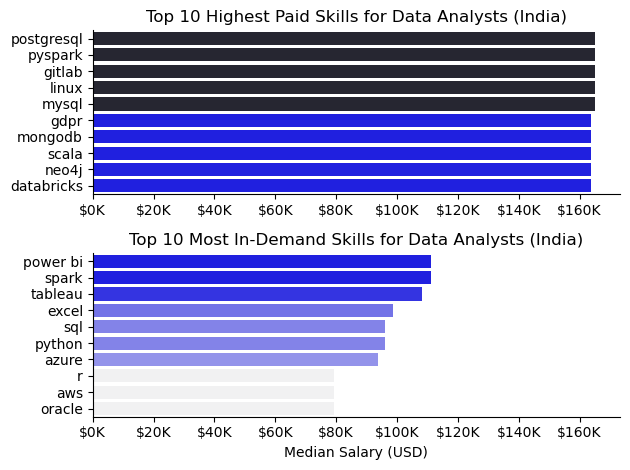

In [12]:
# Setting Up for Plot
fig,ax = plt.subplots(2,1)


# Creating Plot
sns.barplot(data=mediansalyr_ind, x='median', y=mediansalyr_ind.index, hue='median', ax=ax[0], palette='dark:b_r')
sns.barplot(data=countsalyr_ind,  x='median', y=countsalyr_ind.index,  hue='median', ax=ax[1], palette='light:b')

# Modifying Axes and Lables
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts (India)')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))
ax[0].legend().remove()

ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts (India)')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim()) 
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K')) # to convert 100000 to $100k at x-axis
ax[1].legend().remove()

# Displaying the plot
sns.despine()     # to remove borders                                                                                                                           # removes the bord
plt.tight_layout()
plt.show()

# Combined Plot

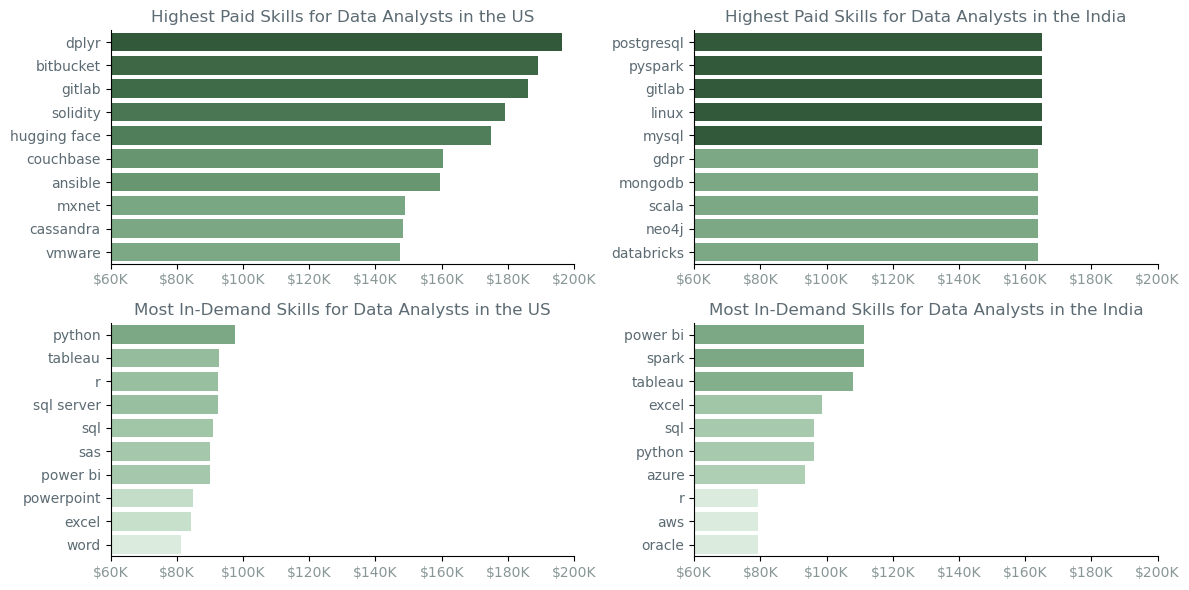

In [13]:
salaries = [mediansalyr_us, countsalyr_us, mediansalyr_ind, countsalyr_ind]

# Setting Up for Plot
fig,ax = plt.subplots(2,2, figsize = (12,6))

# Creating Plot
for i in range(2):
    for j in range(2):
        index = j * 2 + i
        if index < len(salaries):
            palette =  sns.cubehelix_palette(start=2, rot=0, dark=.3, light=.6, reverse=False, as_cmap=True) if i == 0 else sns.cubehelix_palette(start=2, rot=0, dark=.6, light=.9, reverse=False, as_cmap=True)
            sns.barplot(data=salaries[index], x='median', y=salaries[index].index, hue='median', ax=ax[i, j], palette=palette, legend=False)
            
            #  Modifying Axes and Labels
            ax[i,j].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K')) # to convert 100000 to $100k at x-axis
            ax[i,j].set_xlabel('')
            ax[i,j].set_ylabel('')
            ax[i,j].set_xlim(60000,200000)
            # Set the color of x-axis and y-axis ticks
            ax[i,j].tick_params(axis='x', labelcolor='#889696')
            ax[i,j].tick_params(axis='y', labelcolor='#5c6b73')

#  Modifying Axes and Labels
ax[0,0].set_title('Highest Paid Skills for Data Analysts in the US',    color = '#5c6b73')
ax[1,0].set_title('Most In-Demand Skills for Data Analysts in the US',  color = '#5c6b73')
ax[0,1].set_title('Highest Paid Skills for Data Analysts in the India', color = '#5c6b73')
ax[1,1].set_title('Most In-Demand Skills for Data Analysts in the India', color = '#5c6b73')

# Displaying the plot
sns.despine()
plt.tight_layout()
plt.show()

<span style="color:#d7ba7d; font-size:50px;"> End </span>

---